## Objective:

Explore the satellite images of a selected zone within sundarban range and obtain vegetation indices to understand the forest coverage. For this, we will use a small part of the Sundarbans satellite data which was acquired using the Sentinel-2 Satellite on 27 January 2020.

Dataset link: https://github.com/itisha89/Sunderbans

In [57]:
! git clone https://github.com/itisha89/Sunderbans.git

Cloning into 'Sunderbans'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 9.47 MiB | 25.32 MiB/s, done.


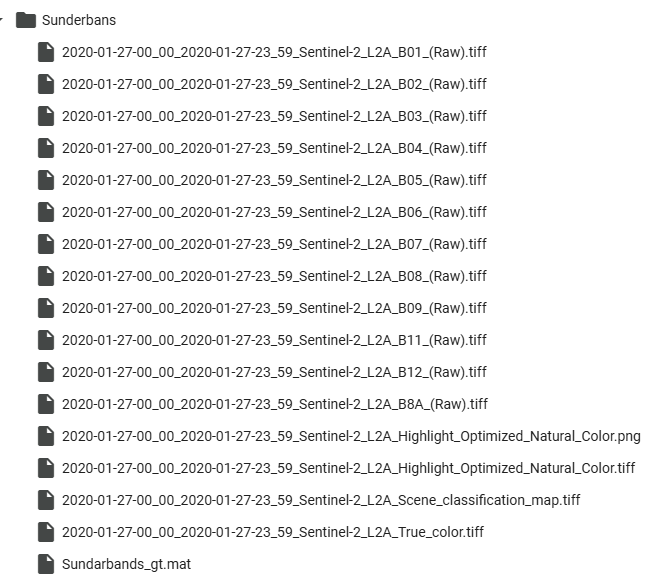

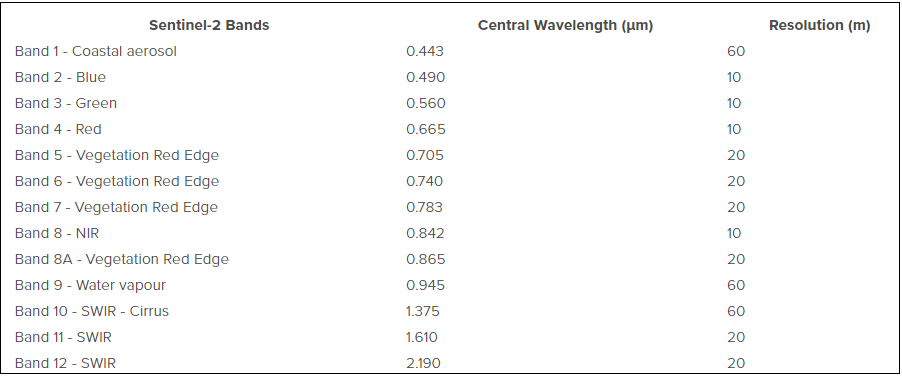

In [31]:
!pip install earthpy

In [32]:
import earthpy as ep
import earthpy.spatial as es
import earthpy.plot as epp
import glob as gb

Consider only .tiff files containting the 12 spectral bands using glob()

In [58]:
import glob as gb
sunderbans_paths = gb.glob("/content/Sunderbans/*B*.tiff")
sunderbans_paths

['/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
 '/content/Sunderbans/2020-01-27

In [59]:
sunderbans_paths.sort()
sunderbans_paths

['/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
 '/content/Sunderbans/2020-01-27

### Plotting RGB composite image


In [60]:
# Reading each .tiff file  using rasterio

import rasterio as rio
band1_path = '/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff'
band1=rio.open(band1_path)
band1

<open DatasetReader name='/content/Sunderbans/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff' mode='r'>

From the output, you may observe that the dataset is open in read mode. This implies that you cannot modify this .tiff file.

In [61]:
band1_arr=band1.read(1)
band1_arr.shape

(954, 298)

The returned object is a two-dimensional numpy array having 954 rows and 298 columns. Now that we have opened and read a raster band, we can plot the band using imshow() function of matplotlib.pyplot module

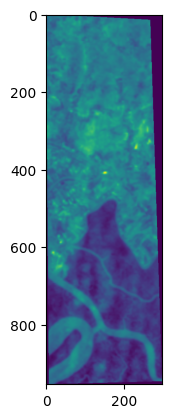

In [62]:
import matplotlib.pyplot as plt
plt.imshow(band1_arr)
plt.show()

Getting bands for all tiifs

In [64]:
# S2.5: Open and read all 12 bands using rasterio.
all_bands = []

for path in sunderbans_paths:
  with rio.open(path) as file:
    all_bands.append(file.read(1))

print("Number of 2D arrays:",len(all_bands))
all_bands

Number of 2D arrays: 12


[array([[4954, 4863, 4797, ...,    0,    0,    0],
        [5020, 4941, 4882, ...,    0,    0,    0],
        [5046, 4974, 4922, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16),
 array([[5453, 4692, 4784, ...,    0,    0,    0],
        [5544, 5564, 5564, ...,    0,    0,    0],
        [5243, 5112, 5459, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16),
 array([[8297, 7523, 6960, ...,    0,    0,    0],
        [8480, 7340, 7523, ...,    0,    0,    0],
        [8257, 7956, 7156, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint

Hence, we obtained total 12 of two-dimensional arrays each containing a spectral band data.

Let us now stack all the 2D arrays inside a  3D array using `stack()` function of the `numpy` module.

In [66]:
import numpy as np
arr_st=np.stack(all_bands,axis=0)
arr_st

array([[[4954, 4863, 4797, ...,    0,    0,    0],
        [5020, 4941, 4882, ...,    0,    0,    0],
        [5046, 4974, 4922, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[5453, 4692, 4784, ...,    0,    0,    0],
        [5544, 5564, 5564, ...,    0,    0,    0],
        [5243, 5112, 5459, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[8297, 7523, 6960, ...,    0,    0,    0],
        [8480, 7340, 7523, ...,    0,    0,    0],
        [8257, 7956, 7156, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[3539, 3093, 431

In [67]:
arr_st.shape

(12, 954, 298)

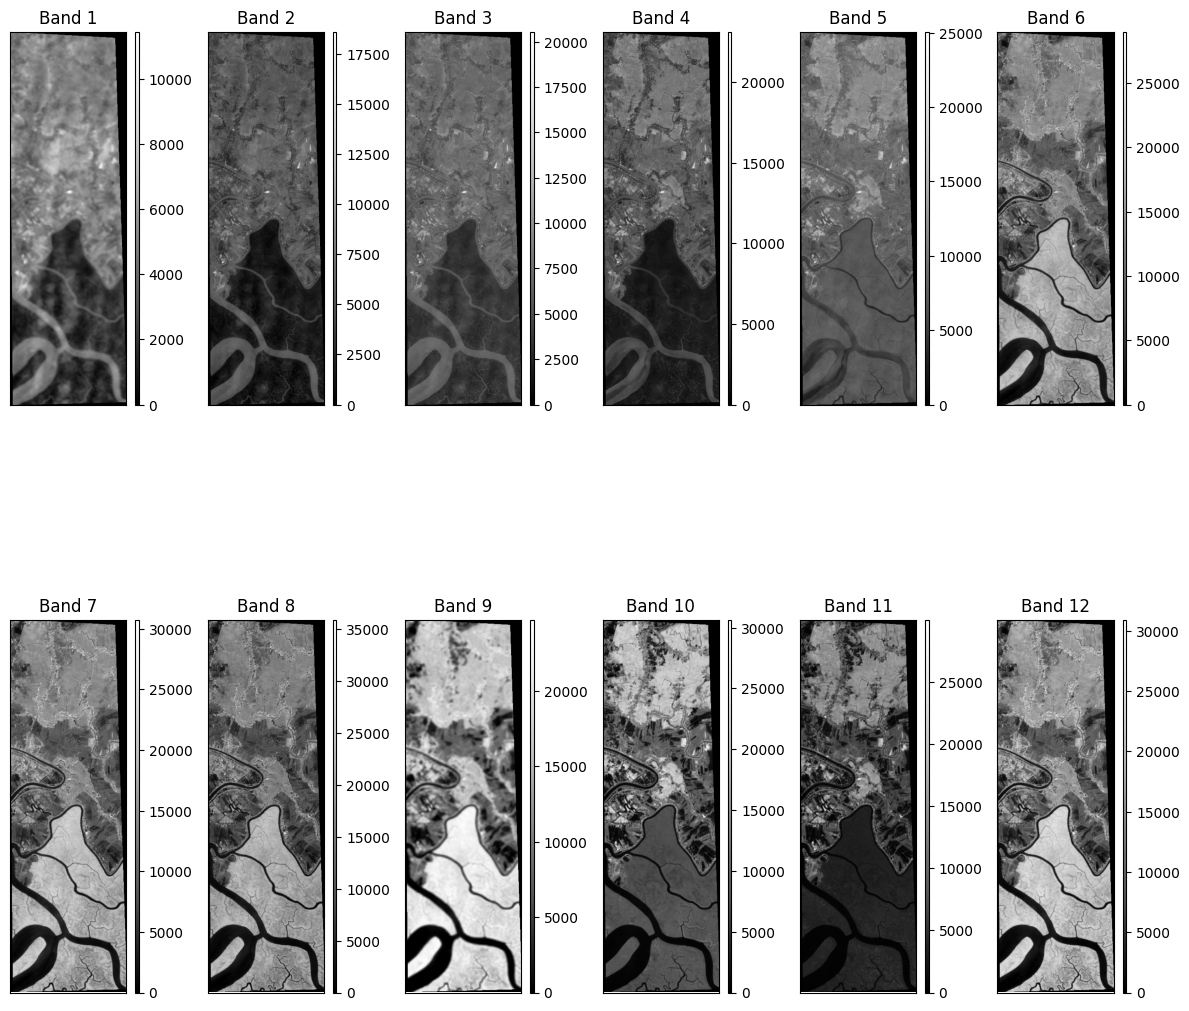

In [69]:
import earthpy.plot as epp
import matplotlib.pyplot as plt
epp.plot_bands(arr_st, cols=6)
plt.show()

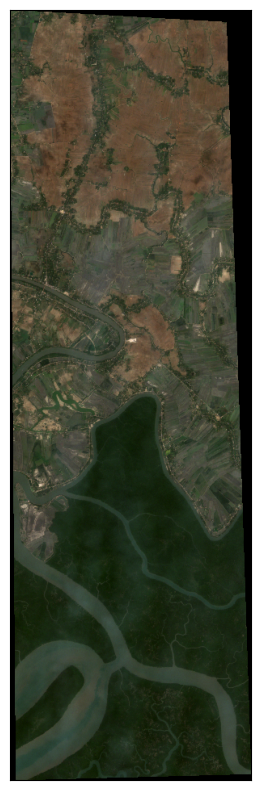

In [71]:
# Band 4, 3, 2 have RGB and their indexes are 3,2,1
epp.plot_rgb(arr_st, rgb=(3,2,1))
plt.show()

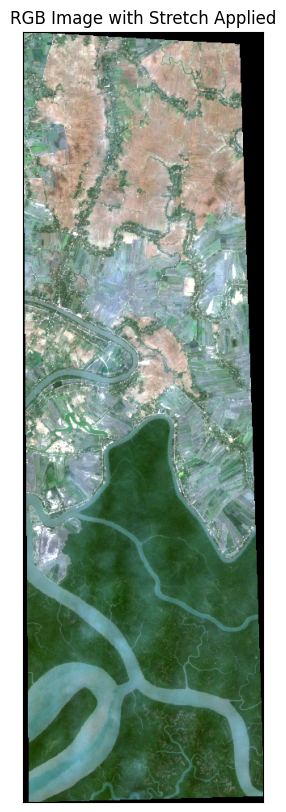

In [72]:
# S2.9: Stretch the RGB composite image with str_clip = 0.5
epp.plot_rgb(arr_st, rgb = (3, 2, 1), stretch = True, str_clip = 0.5,
             title = "RGB Image with Stretch Applied")

plt.show()

## Plotting NVDI

 $$\text{NDVI} = \frac{\text{(NIR - Red)}}{\text{(NIR + Red)}}$$

/usr/local/lib/python3.11/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in divide
  n_diff = (b1 - b2) / (b1 + b2)


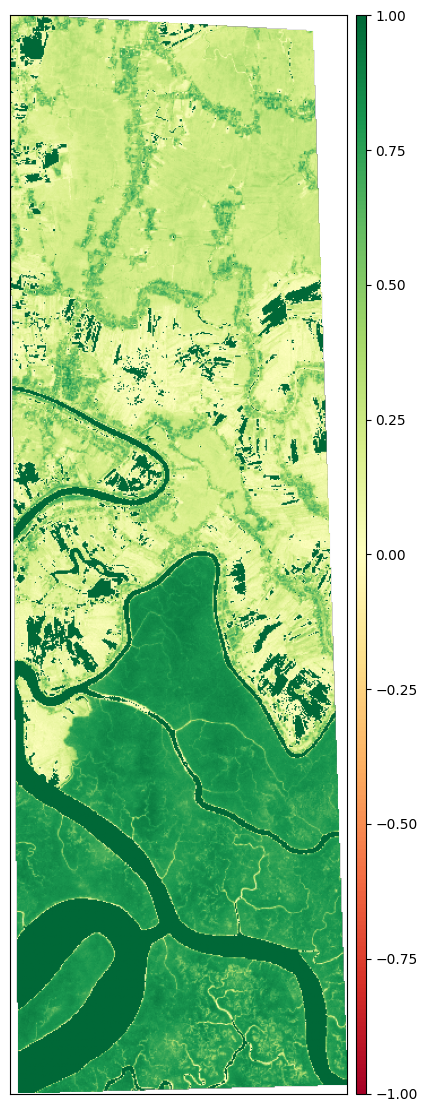

In [73]:
# Calcualting NVDI NIR is band 8 and Red is band 4

import earthpy.spatial as es
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

epp.plot_bands(ndvi, cmap="RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14))

plt.show()

Here you can observe:

The area shaded in light green color represents light vegetation.

The area shaded in dark green color represents dense vegetation.

The water bodies are marked using a distinctively a darker color out of the palettes  +1  value.

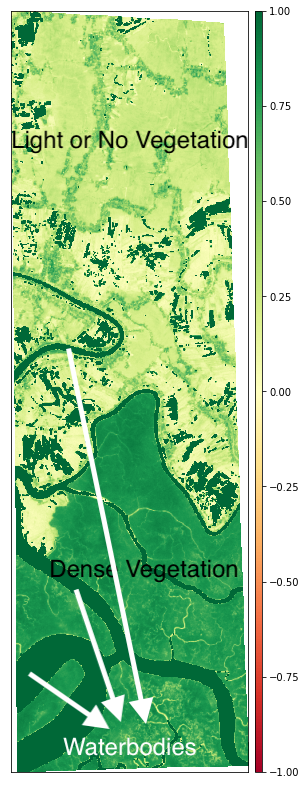

## Calculating RENDVI
Red-edge normalised difference vegetation index
- RENDVI is used to measure the chlorophyll content in plants.
- It is also known as normalized difference red edge index (NDRE).
-  It is measured in a way similar to NDVI but uses the ratio of NIR and RE bands:

$$\text{RENDVI} = \frac{\text{(NIR - RE)}}{\text{(NIR + RE)}}$$

  - $\text{NIR}$ is at band 8.
  - $\text{RE}$ is at band 5

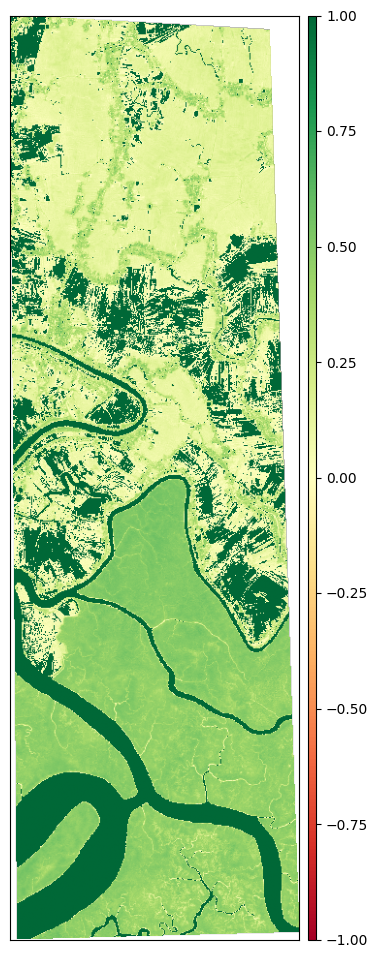

In [74]:
rendvi = es.normalized_diff(arr_st[7], arr_st[4])
epp.plot_bands(rendvi, cmap = "RdYlGn", vmin = -1, vmax = 1)
plt.show()

Here, we observe that the chlorophyll distribution is a bit different when compared with NDVI as it is highly dependent on:

The season and climatic conditions

Plant maturity

Type of the plant.

A general practice is to analyse the RENDVI at scientifically identified seasons to extract meaningful information on the crop health

## Calculating EVI
Enhanced Vegetation Index

Enhanced vegetation index is an optimised extension of NDVI and uses the information from the blue wavelength band to improve the accuracy of NDVI. It is particularly useful for:

1. Areas with dense canopy.

2. Correcting the atmospheric influences.

It is calculated as:

$$\text{EVI} = \frac{2.5 \times (\text{(NIR} - \text{Red})}{\text{[NIR} + (6 \times{\text{Red}}) - (7.5 \times \text{Blue}) + 1.0]}$$



For our Sentinel-2 raster data (refer `Table 1`),
  - $\text{NIR}$ is at band 8.
  - $\text{Red}$ is at band 4.
  - $\text{Blue}$ is at band 2.


<ipython-input-75-18dd9b1b6704>:1: RuntimeWarning: divide by zero encountered in divide
  evi = 2.5 * (arr_st[7] - arr_st[3]) / (arr_st[7] + (6.0 * arr_st[3]) - (7.5 * arr_st[1]) + 1.0)


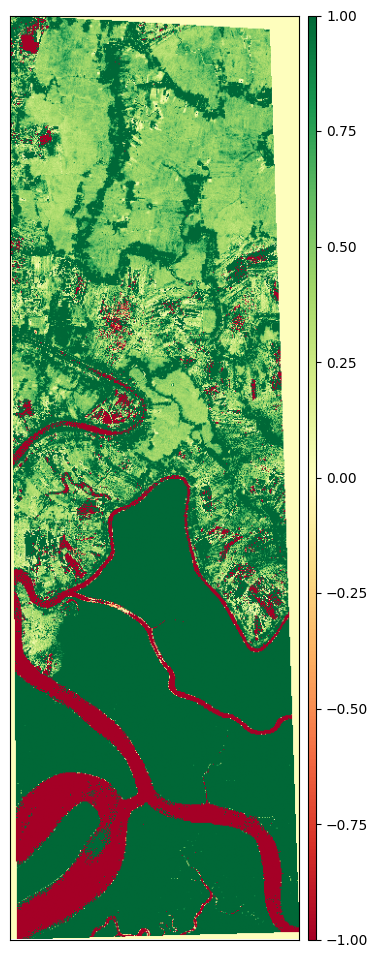

In [75]:
evi = 2.5 * (arr_st[7] - arr_st[3]) / (arr_st[7] + (6.0 * arr_st[3]) - (7.5 * arr_st[1]) + 1.0)
epp.plot_bands(evi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1)
plt.show()

Here we observe, that water bodies are clearly marked in red color.

Advantages of EVI:

It enables us to clearly identify smaller water bodies. This is evident from the above plot.

Due to improved sensitivity the variation in density in lighter vegetation areas can be identified easily.